In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np


# Import dataset and Create dataframe

## Train set

In [2]:
train_data_fol = '../data/Training Data/'

train_img_path = []
train_labels = []

train_label_fol = os.listdir(train_data_fol)

for fol in train_label_fol:
    fol_path = os.path.join(train_data_fol,fol)
    files = os.listdir(fol_path)
    for img in files:
        img_path = os.path.join(fol_path,img)
        train_img_path.append(img_path)
        train_labels.append(fol)

train_df = pd.DataFrame(data={'file_path':train_img_path,'label':train_labels})
        

In [3]:
train_df
# 2000 images,15 classes 
# total should have 30000 observations

,file_path,label
0,../data/Training Data/Beetle\Beetle-Train (1)....,Beetle
1,../data/Training Data/Beetle\Beetle-Train (1).jpg,Beetle
2,../data/Training Data/Beetle\Beetle-Train (10)...,Beetle
3,../data/Training Data/Beetle\Beetle-Train (10)...,Beetle
4,../data/Training Data/Beetle\Beetle-Train (100...,Beetle
...,...,...
29995,../data/Training Data/Zebra\Zebra (995).jpeg,Zebra
29996,../data/Training Data/Zebra\Zebra (996).jpeg,Zebra
29997,../data/Training Data/Zebra\Zebra (997).jpeg,Zebra
29998,../data/Training Data/Zebra\Zebra (998).jpeg,Zebra


In [4]:
os.getcwd()

'c:\\Users\\Quah\\OneDrive\\Desktop\\New folder\\Convolutional_Neural_Network\\src'

In [5]:
train_label_fol

['Beetle',
 'Butterfly',
 'Cat',
 'Cow',
 'Dog',
 'Elephant',
 'Gorilla',
 'Hippo',
 'Lizard',
 'Monkey',
 'Mouse',
 'Panda',
 'Spider',
 'Tiger',
 'Zebra']

## Validation set

In [6]:
val_data_fol = '../data/Validation Data/'

val_img_path = []
val_labels = []

val_label_fol = os.listdir(val_data_fol)

for fol in val_label_fol:
    fol_path = os.path.join(val_data_fol,fol)
    files = os.listdir(fol_path)
    for img in files:
        img_path = os.path.join(fol_path,img)
        val_img_path.append(img_path)
        val_labels.append(fol)

val_df = pd.DataFrame(data={'file_path':val_img_path,'label':val_labels})

In [7]:
val_df

,file_path,label
0,../data/Validation Data/Beetle\Beatle-Valid (1...,Beetle
1,../data/Validation Data/Beetle\Beatle-Valid (1...,Beetle
2,../data/Validation Data/Beetle\Beatle-Valid (1...,Beetle
3,../data/Validation Data/Beetle\Beatle-Valid (1...,Beetle
4,../data/Validation Data/Beetle\Beatle-Valid (1...,Beetle
...,...,...
1995,../data/Validation Data/Zebra\Zebra-Valid (366...,Zebra
1996,../data/Validation Data/Zebra\Zebra-Valid (367...,Zebra
1997,../data/Validation Data/Zebra\Zebra-Valid (368...,Zebra
1998,../data/Validation Data/Zebra\Zebra-Valid (369...,Zebra


## Test set

In [8]:
test_data_fol = '../data/Testing Data/'

test_img_path = []
test_labels = []

test_label_fol = os.listdir(test_data_fol)

for fol in test_label_fol:
    fol_path = os.path.join(test_data_fol,fol)
    files = os.listdir(fol_path)
    for img in files:
        img_path = os.path.join(fol_path,img)
        test_img_path.append(img_path)
        test_labels.append(fol)

test_df = pd.DataFrame(data={'file_path':test_img_path,'label':test_labels})

In [9]:
test_df

,file_path,label
0,../data/Testing Data/Beetle\Beatle-Test (1).jpeg,Beetle
1,../data/Testing Data/Beetle\Beatle-Test (1).jpg,Beetle
2,../data/Testing Data/Beetle\Beatle-Test (10).jpeg,Beetle
3,../data/Testing Data/Beetle\Beatle-Test (10).jpg,Beetle
4,../data/Testing Data/Beetle\Beatle-Test (11).jpeg,Beetle
...,...,...
2402,../data/Testing Data/Zebra\Zebra-Test (95).jpeg,Zebra
2403,../data/Testing Data/Zebra\Zebra-Test (96).jpeg,Zebra
2404,../data/Testing Data/Zebra\Zebra-Test (97).jpeg,Zebra
2405,../data/Testing Data/Zebra\Zebra-Test (98).jpeg,Zebra


# Data Explorations

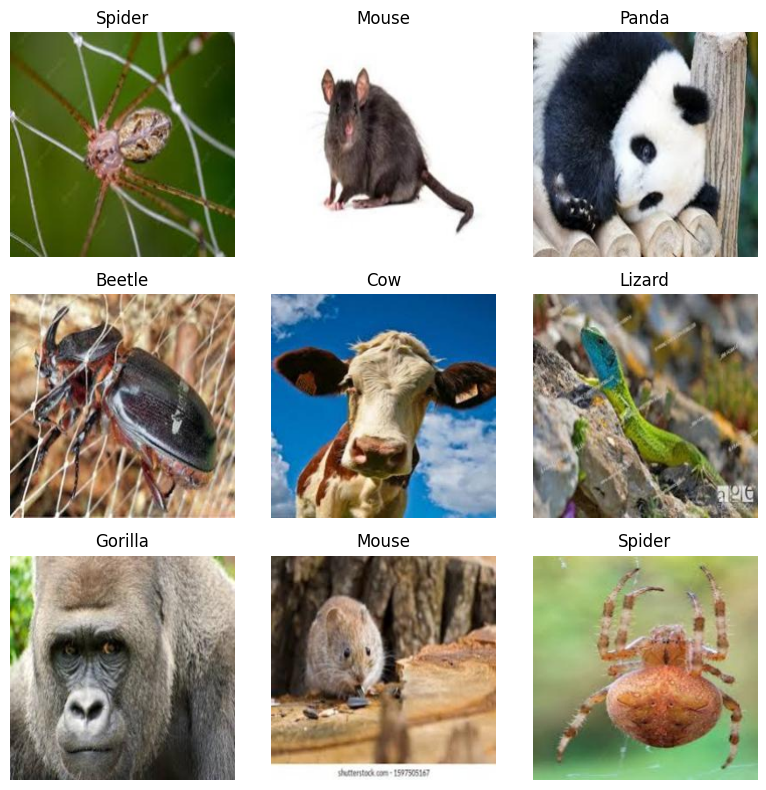

In [22]:
import random
from PIL import Image
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

for i in range(9):
    idx = random.randint(0, len(train_df)-1)
    img_path = train_df.iloc[idx]['file_path']
    label = train_df.iloc[idx]['label']
    
    img = Image.open(img_path).resize((224,224))
    
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Check class distribution
train_df['label'].value_counts()

label
Beetle       2000
Butterfly    2000
Cat          2000
Cow          2000
Dog          2000
Elephant     2000
Gorilla      2000
Hippo        2000
Lizard       2000
Monkey       2000
Mouse        2000
Panda        2000
Spider       2000
Tiger        2000
Zebra        2000
Name: count, dtype: int64

# Data Preprocessing

In [25]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.1
)

val_test_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


In [26]:
batch_size = 32
img_size = (224, 224)

train_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='file_path',
    y_col='label',
    target_size=img_size,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True
)

val_data = val_test_gen.flow_from_dataframe(
    val_df,
    x_col='file_path',
    y_col='label',
    target_size=img_size,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

test_data = val_test_gen.flow_from_dataframe(
    test_df,
    x_col='file_path',
    y_col='label',
    target_size=img_size,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

Found 30000 validated image filenames belonging to 15 classes.
Found 2000 validated image filenames belonging to 15 classes.
Found 2407 validated image filenames belonging to 15 classes.


# Build the model

In [27]:
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False   # Freeze base model


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Add classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
num_classes = len(train_data.class_indices)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3
)


In [ ]:
# Train the model (Frozen base)
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 9252s 10s/step - accuracy: 0.9309 - loss: 0.2813 - val_accuracy: 0.9660 - val_loss: 0.1145 - learning_rate: 0.0010
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 759s 809ms/step - accuracy: 0.9617 - loss: 0.1323 - val_accuracy: 0.9700 - val_loss: 0.1024 - learning_rate: 0.0010
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 752s 802ms/step - accuracy: 0.9663 - loss: 0.1152 - val_accuracy: 0.9690 - val_loss: 0.1018 - learning_rate: 0.0010
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 778s 829ms/step - accuracy: 0.9682 - loss: 0.1046 - val_accuracy: 0.9735 - val_loss: 0.0875 - learning_rate: 0.0010
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 850s 906ms/step - accuracy: 0.9691 - loss: 0.1024 - val_accuracy: 0.9735 - val_loss: 0.0901 - learning_rate: 0.0010
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 810s 863ms/step - accuracy: 0.9686 - loss: 0.0989 - val_accuracy: 0.9725 - val_loss: 0.0899 - learning_rate: 0.0010
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 840s 895ms/step - accurac

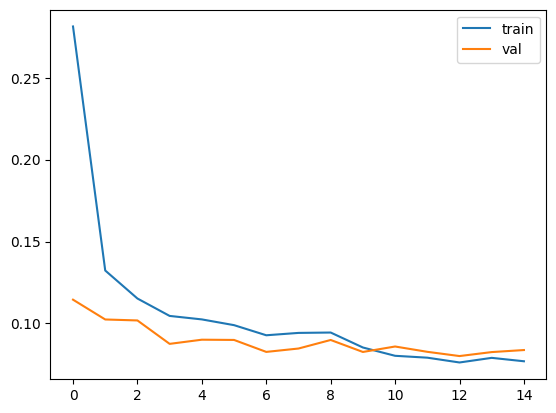

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()

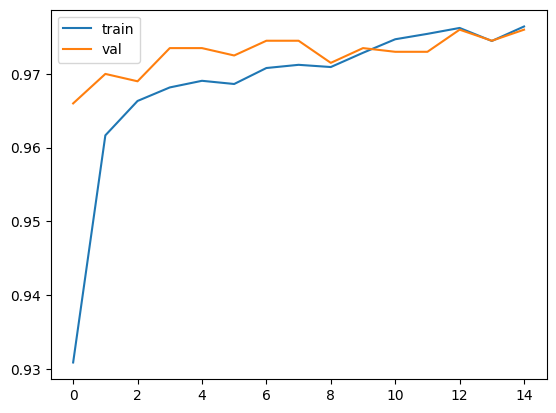

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','val'])
plt.show()


In [ ]:
# Fine tuning 
base_model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1317s 1s/step - accuracy: 0.9442 - loss: 0.1770 - val_accuracy: 0.9655 - val_loss: 0.1116 - learning_rate: 1.0000e-05
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 814s 867ms/step - accuracy: 0.9560 - loss: 0.1416 - val_accuracy: 0.9660 - val_loss: 0.1027 - learning_rate: 1.0000e-05
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 826s 880ms/step - accuracy: 0.9600 - loss: 0.1273 - val_accuracy: 0.9670 - val_loss: 0.0990 - learning_rate: 1.0000e-05
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 821s 875ms/step - accuracy: 0.9605 - loss: 0.1244 - val_accuracy: 0.9690 - val_loss: 0.0987 - learning_rate: 3.0000e-06
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 818s 872ms/step - accuracy: 0.9631 - loss: 0.1195 - val_accuracy: 0.9695 - val_loss: 0.0971 - learning_rate: 3.0000e-06


In [37]:
test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)


76/76 ━━━━━━━━━━━━━━━━━━━━ 68s 897ms/step - accuracy: 0.9506 - loss: 0.1676
Test Accuracy: 0.9505608677864075


In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes

print(classification_report(y_true, y_pred))


76/76 ━━━━━━━━━━━━━━━━━━━━ 55s 695ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       100
           1       0.92      0.94      0.93       100
           2       0.98      0.90      0.94       394
           3       0.98      0.98      0.98       177
           4       0.86      0.94      0.90        88
           5       1.00      0.96      0.98       306
           6       0.67      1.00      0.80        30
           7       0.84      0.98      0.90        57
           8       0.89      0.98      0.93       100
           9       0.97      0.98      0.98       184
          10       0.78      0.80      0.79       100
          11       0.98      0.97      0.98       237
          12       0.96      0.93      0.94       100
          13       0.95      0.98      0.96       164
          14       1.00      0.98      0.99       270

    accuracy                           0.95      2407
   macro avg       0.92      0.95     

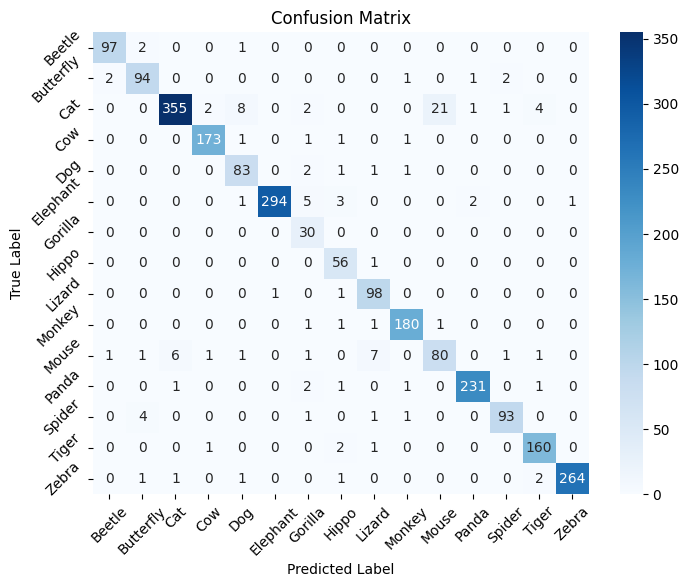

In [41]:
cm = confusion_matrix(y_true, y_pred)
class_names = list(test_data.class_indices.keys())

plt.figure(figsize=(8,6))

sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()



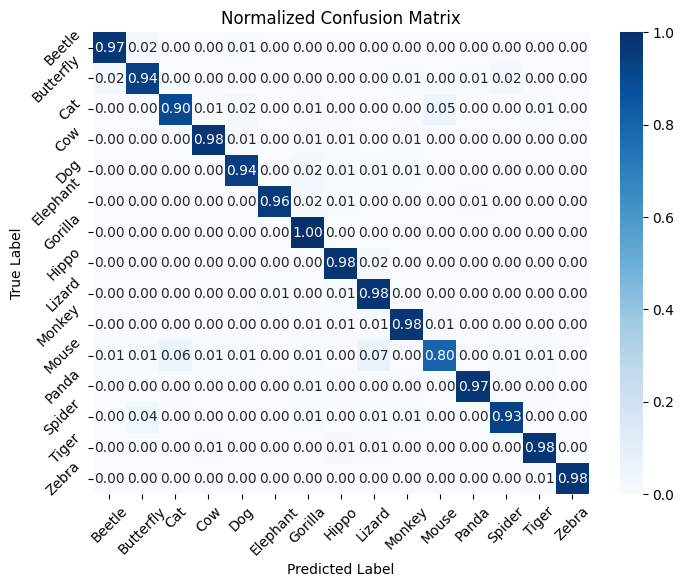

In [42]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,6))

sns.heatmap(cm_normalized,
            annot=True,
            fmt='.2f',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [39]:
class_indices = test_data.class_indices
class_names = list(class_indices.keys())


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


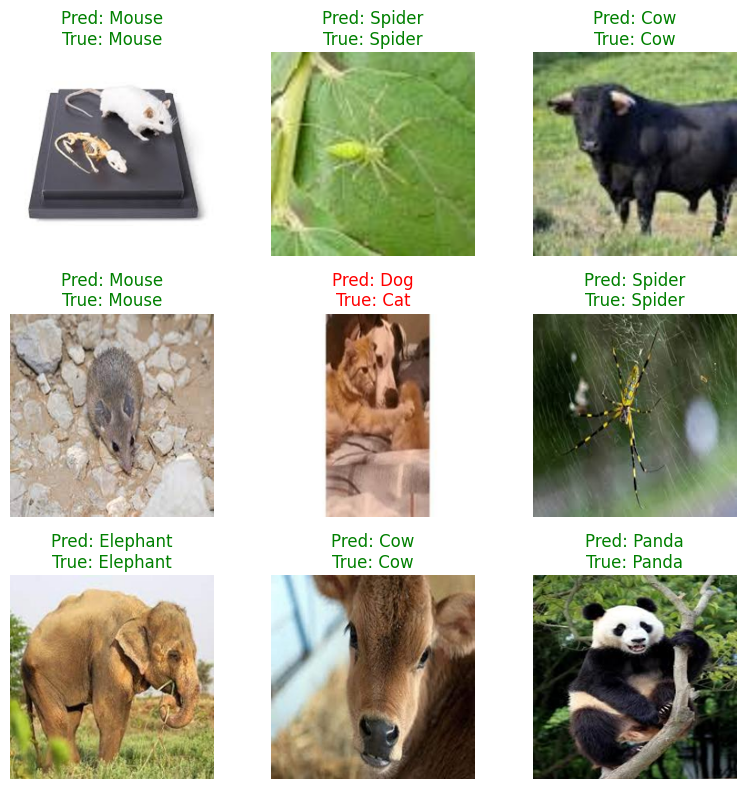

In [40]:
import matplotlib.pyplot as plt
from PIL import Image
import random

plt.figure(figsize=(8,8))

for i in range(9):
    idx = random.randint(0, len(test_df)-1)
    
    img_path = test_df.iloc[idx]['file_path']
    true_label = test_df.iloc[idx]['label']
    
    # Predict this image
    img = Image.open(img_path).resize((224,224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    from tensorflow.keras.applications.efficientnet import preprocess_input
    img_array = preprocess_input(img_array)
    
    pred = model.predict(img_array)
    pred_class = class_names[np.argmax(pred)]
    
    # Plot
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    
    if pred_class == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.title(f"Pred: {pred_class}\nTrue: {true_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()
